# Name  : Varad Vikas Patil
# Roll no.  : 22b2270

# Importing Essential Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Step 1: Data Loading

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Normalize the images to [0, 1] range

In [3]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

## Convert labels to one-hot encoding

In [4]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Split training set into training and validation sets

In [5]:
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

# Step 2: Model Definition

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

## Compile the model

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Defining some hyperparams

In [9]:
Epochs = 67
BatchSize = 32

# Step 3: Training

In [10]:
history = model.fit(x_train, y_train, epochs=Epochs, batch_size=BatchSize, validation_data=(x_val, y_val))

Epoch 1/67
1563/1563 [==============================] - 1s 887us/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.1141 - val_accuracy: 0.9746
Epoch 2/67
1563/1563 [==============================] - 1s 864us/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.1064 - val_accuracy: 0.9762
Epoch 3/67
1563/1563 [==============================] - 1s 940us/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.1116 - val_accuracy: 0.9769
Epoch 4/67
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.1323 - val_accuracy: 0.9751
Epoch 5/67
1563/1563 [==============================] - 1s 868us/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.1184 - val_accuracy: 0.9789
Epoch 6/67
1563/1563 [==============================] - 1s 857us/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.1146 - val_accuracy: 0.9785
Epoch 7/67
1563/1563 [==============================] - 1s 853us/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.1381 - v

1563/1563 [==============================] - 1s 866us/step - loss: 0.0050 - accuracy: 0.9987 - val_loss: 0.2637 - val_accuracy: 0.9781
Epoch 58/67
1563/1563 [==============================] - 1s 884us/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.2274 - val_accuracy: 0.9806
Epoch 59/67
1563/1563 [==============================] - 1s 943us/step - loss: 0.0054 - accuracy: 0.9988 - val_loss: 0.2208 - val_accuracy: 0.9805
Epoch 60/67
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.2619 - val_accuracy: 0.9784
Epoch 61/67
1563/1563 [==============================] - 1s 871us/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.2417 - val_accuracy: 0.9799
Epoch 62/67
1563/1563 [==============================] - 1s 888us/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.2720 - val_accuracy: 0.9776
Epoch 63/67
1563/1563 [==============================] - 1s 884us/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.2621 - val_ac

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Step 4: Validation

In [12]:
val_loss, val_acc = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_acc}')

313/313 [==============================] - 0s 489us/step - loss: 0.2601 - accuracy: 0.9784
Validation Loss: 0.2600756585597992
Validation Accuracy: 0.9783999919891357


# Step 5: Testing

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 0s 516us/step - loss: 0.2348 - accuracy: 0.9786
Test Loss: 0.23479914665222168
Test Accuracy: 0.978600025177002


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

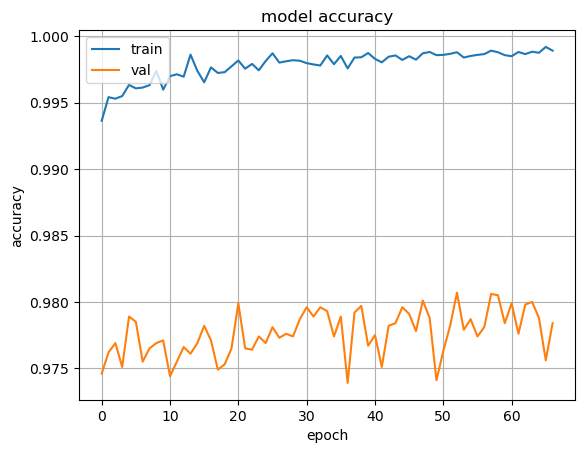

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

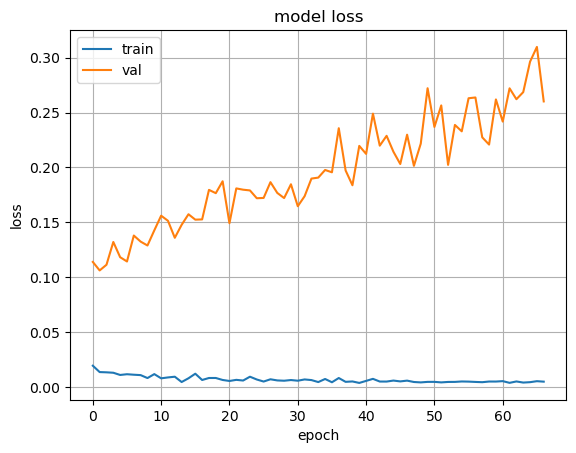

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()

# Step 6: Visualization

In [26]:
def plot_sample_predictions(model, x_test, y_test, n_samples=5):
    indices = np.random.choice(len(x_test), n_samples, replace=False)
    x_sample = x_test[indices]
    y_sample = y_test[indices]

    y_pred = np.argmax(model.predict(x_sample), axis=1)
    y_true = np.argmax(y_sample, axis=1)

    plt.figure(figsize=(10, 2))
    for i in range(n_samples):
        plt.subplot(1, n_samples, i + 1)
        plt.imshow(x_sample[i], cmap='gray')
        plt.title(f'Pred: {y_pred[i]}\nTrue: {y_true[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 13ms/step


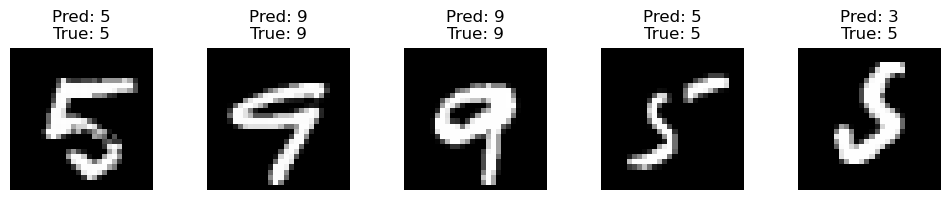

In [27]:
plot_sample_predictions(model, x_test, y_test)